# BMEN 509 Project - Image Segmentation Algorithm

### Date
March 15th, 2024

### Authors
Reuben Christian - UCID: 10149810  
Jacob Nguyen - UCID: 30087465  
Ty Pilling - UCID: 30112537  
Gary Fong - UCID: 10154089  


## Purpose

This algorithm identifies and counts cells using image segmentation. It segments images with a sequence of processing techniques, including histogram equalization, median filtering, thresholding, and finally edge detection.

We optimized the algorithm for detecting cells in the [CIL Project: P1723](http://cellimagelibrary.org/project/P1723?per_page=10&page=1) dataset, which consists of alpha-synuclein nuclei counterstained in blue against red or green.


## Notebook Setup

In [ ]:
%pip install opencv-python

In [2]:
# Library Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# Setup Jupyter notebook specifics
%matplotlib inline

# Numpy printing help
np.set_printoptions(precision=2)

In [34]:
data_directory = os.path.join('.', 'Data')
result_directory = os.path.join('.', 'Results')
image_prefix = '112006'

# Get a list of all files in the data directory
file_list = os.listdir(data_directory)

# Filter the list to include only files starting with the specified prefix
filtered_files = [file for file in file_list if file.startswith(image_prefix)]

# Check if the number of filtered files is equal to the expected number of images
expected_count = 35
if len(filtered_files) == expected_count:
    print('All images are present.')
else:
    print('Images are missing. Please make sure you have downloaded the data and placed it in the correct directory.')


All images are present.


## Image Processing

### Constants

In [38]:
median_kernel_size = 7
gaussian_kernel_size = (9, 9)
gaussian_sigma = 0

# HSV min/max values
h_min = 60
s_min = 50
v_min = 0
h_max = 140
s_max = 255
v_max = 255
lower = np.array([h_min, s_min, v_min])
upper = np.array([h_max, s_max, v_max])

mask_kernel = 17


### Process and display each processing step on sample

Cell count: 63


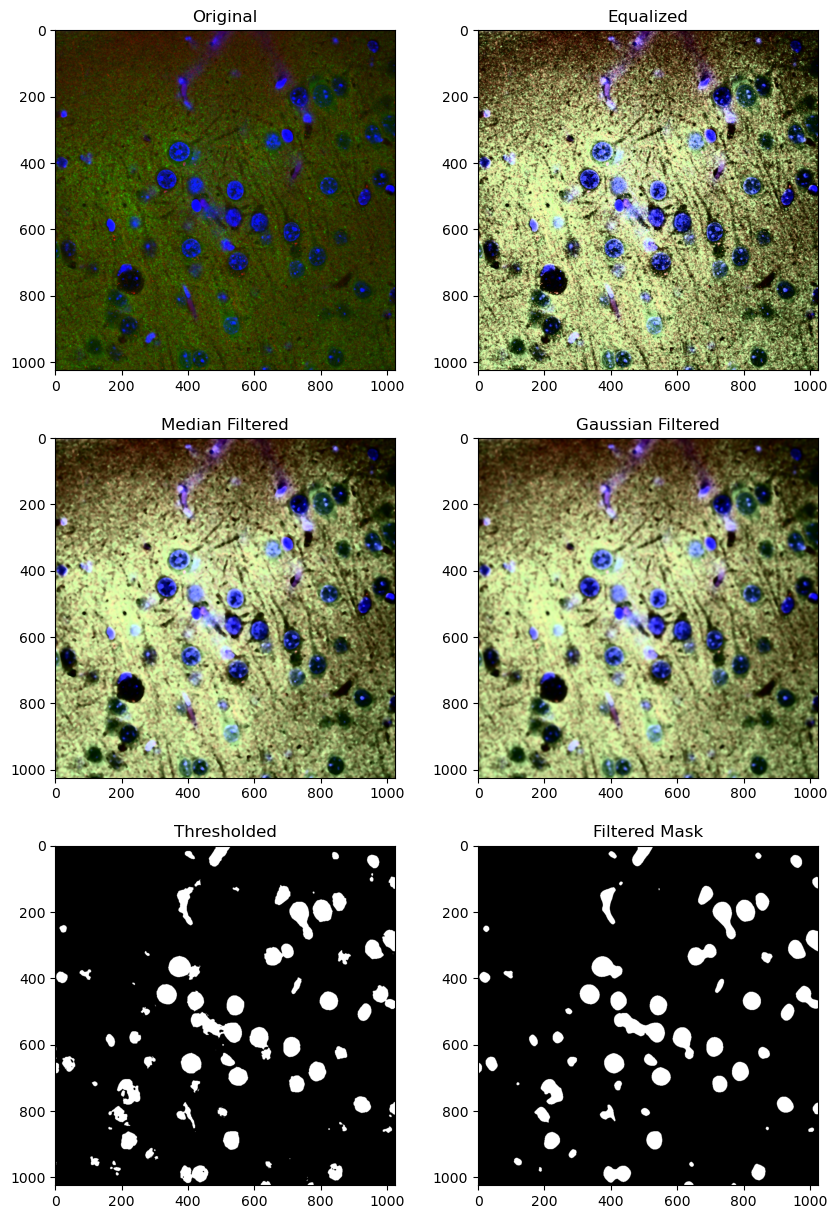

In [37]:
# Layout subplots
size = (3, 2)
plt.subplots(size[0], size[1], figsize=(10,15))

# Load original sample image
sample_image_name = '112006bbbb_RGB.tif'
image_path = os.path.join(data_directory, sample_image_name)
image = cv.imread(image_path)
rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.subplot(size[0], size[1], 1)
plt.imshow(rgb_image)
plt.title('Original')

# Histogram equalization
yuv_image = cv.cvtColor(image, cv.COLOR_BGR2YUV) # Convert to YUV color space
yuv_image[:,:,0] = cv.equalizeHist(yuv_image[:,:,0]) # Equalize the histogram of the Y channel
equalized_image = cv.cvtColor(yuv_image, cv.COLOR_YUV2RGB) # Convert back to RGB color space
plt.subplot(size[0], size[1], 2)
plt.imshow(equalized_image)
plt.title('Equalized')

# Median filter
median_image = cv.medianBlur(equalized_image, median_kernel_size)
plt.subplot(size[0], size[1], 3)
plt.imshow(median_image)
plt.title('Median Filtered')

# Gaussian filter
gaussian_image = cv.GaussianBlur(median_image, gaussian_kernel_size, gaussian_sigma)
plt.subplot(size[0], size[1], 4)
plt.imshow(gaussian_image)
plt.title('Gaussian Filtered')

# Thresholding
hsv_image = cv.cvtColor(gaussian_image, cv.COLOR_RGB2HSV) # Convert to HSV color space
threshold_image = cv.inRange(hsv_image, lower, upper) # Create a binary mask of the image using the specified HSV range
plt.subplot(size[0], size[1], 5)
plt.imshow(threshold_image, cmap='gray')
plt.title('Thresholded')

# Filter mask with aggressive median filter
filtered_mask = cv.medianBlur(threshold_image, mask_kernel)
plt.subplot(size[0], size[1], 6)
plt.imshow(filtered_mask, cmap='gray')
plt.title('Filtered Mask')

# Count cells
contours, _ = cv.findContours(filtered_mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) # Find the contours of the thresholded image
cell_count = len(contours)
print(f'Cell count: {cell_count}')

result_image = cv.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)
os.makedirs(result_directory, exist_ok=True)
cv.imwrite(os.path.join(result_directory, 'Result_' + sample_image_name), result_image)

plt.show()



In [39]:
# Loop over the data files
for file in filtered_files:
    # Load the original image
    image_path = os.path.join(data_directory, file)
    image = cv.imread(image_path)
    
    # Historgram equalization
    yuv_image = cv.cvtColor(image, cv.COLOR_BGR2YUV) # Convert to YUV color space
    yuv_image[:,:,0] = cv.equalizeHist(yuv_image[:,:,0]) # Equalize the histogram of the Y channel
    equalized_image = cv.cvtColor(yuv_image, cv.COLOR_YUV2BGR) # Convert back to RGB color space
    
    # Median filter
    median_image = cv.medianBlur(equalized_image, median_kernel_size)

    # Gaussian filter
    gaussian_image = cv.GaussianBlur(median_image, gaussian_kernel_size, gaussian_sigma)
    
    # Thresholding
    hsv_image = cv.cvtColor(gaussian_image, cv.COLOR_BGR2HSV) # Convert to HSV color space
    
    # Create a binary mask of the image using the specified HSV range
    threshold_image = cv.inRange(hsv_image, lower, upper)
    
    # Filter mask with aggressive median filter
    filtered_mask = cv.medianBlur(threshold_image, mask_kernel)
    
    # Count the cells
    contours, _ = cv.findContours(filtered_mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cell_count = len(contours)
    
    # Print the count and image name
    print(f'Image: {file}, Cell count: {cell_count}')
    
    # Save the result image
    result_image = cv.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)
    os.makedirs(result_directory, exist_ok=True)
    result_image_path = os.path.join(result_directory, 'Result_' + file)
    cv.imwrite(result_image_path, result_image)
    



Image: 112006aaaaaa_RGB.tif, Cell count: 108
Image: 112006aaaaa_RGB.tif, Cell count: 111
Image: 112006aaaa_RGB.tif, Cell count: 107
Image: 112006aaa_RGB.tif, Cell count: 63
Image: 112006aa_RGB.tif, Cell count: 51
Image: 112006a_RGB.tif, Cell count: 149
Image: 112006bbbbbb_RGB.tif, Cell count: 62
Image: 112006bbbbb_RGB.tif, Cell count: 38
Image: 112006bbbb_RGB.tif, Cell count: 61
Image: 112006bb_RGB.tif, Cell count: 33
Image: 112006b_RGB.tif, Cell count: 3
Image: 112006cccccc_RGB.tif, Cell count: 45
Image: 112006ccccc_RGB.tif, Cell count: 48
Image: 112006cccc_RGB.tif, Cell count: 72
Image: 112006dddddd_RGB.tif, Cell count: 66
Image: 112006ddddd_RGB.tif, Cell count: 42
Image: 112006dddd_RGB.tif, Cell count: 84
Image: 112006ddd_RGB.tif, Cell count: 149
Image: 112006dd_RGB.tif, Cell count: 39
Image: 112006d_RGB.tif, Cell count: 74
Image: 112006eeeeee_RGB.tif, Cell count: 59
Image: 112006eeeee_RGB.tif, Cell count: 75
Image: 112006eeee_RGB.tif, Cell count: 64
Image: 112006eee_RGB.tif, Cell c